<a href="https://colab.research.google.com/github/Gauravds435/colabtools/blob/master/ODI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/odi.csv", sep = ",")
df.tail()

mid        date  ... non-striker total
350894  1188  2017-07-10  ...          18   203
350895  1188  2017-07-10  ...          18   203
350896  1188  2017-07-10  ...          18   203
350897  1188  2017-07-10  ...          18   203
350898  1188  2017-07-10  ...          18   203

[5 rows x 15 columns]

In [ ]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [ ]:
df.describe(include="all")

mid        date  ...    non-striker          total
count   350899.000000      350899  ...  350899.000000  350899.000000
unique            NaN        1042  ...            NaN            NaN
top               NaN  2007-02-04  ...            NaN            NaN
freq              NaN        1233  ...            NaN            NaN
mean       594.360426         NaN  ...      12.427944     255.355387
std        343.605128         NaN  ...      15.019181      62.354412
min          1.000000         NaN  ...       0.000000      44.000000
25%        296.000000         NaN  ...       2.000000     217.000000
50%        596.000000         NaN  ...       7.000000     257.000000
75%        893.000000         NaN  ...      18.000000     298.000000
max       1188.000000         NaN  ...     149.000000     444.000000

[11 rows x 15 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


In [ ]:
df.drop_duplicates()
df.shape

(350899, 15)

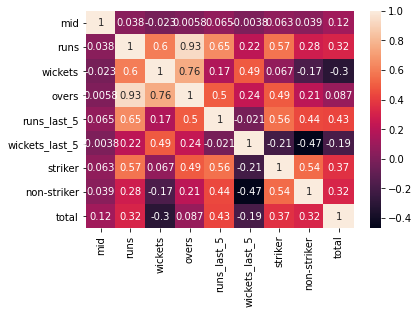

In [ ]:
import seaborn as sns
corrl = df.corr()
corr = sns.heatmap(corrl, xticklabels=corrl.columns, yticklabels=corrl.columns, annot = True)

In [ ]:
df.drop(["wickets", "wickets_last_5"], axis = 1, inplace = True)
df.head()

mid        date  ... non-striker total
0    1  2006-06-13  ...           0   301
1    1  2006-06-13  ...           0   301
2    1  2006-06-13  ...           0   301
3    1  2006-06-13  ...           0   301
4    1  2006-06-13  ...           0   301

[5 rows x 13 columns]

In [ ]:
df.nunique()

mid            1188
date           1042
venue           136
bat_team         21
bowl_team        21
batsman         938
bowler          709
runs            438
overs           350
runs_last_5      99
striker         234
non-striker     135
total           290
dtype: int64

In [ ]:
df.isnull().sum()

mid            0
date           0
venue          0
bat_team       0
bowl_team      0
batsman        0
bowler         0
runs           0
overs          0
runs_last_5    0
striker        0
non-striker    0
total          0
dtype: int64

In [ ]:
df["striker"] = df["striker"].fillna(0)
df["non-striker"] = df["non-striker"].fillna(0)
df["total"] = df["total"].fillna(0)

In [ ]:
df.isnull().sum()

mid            0
date           0
venue          0
bat_team       0
bowl_team      0
batsman        0
bowler         0
runs           0
overs          0
runs_last_5    0
striker        0
non-striker    0
total          0
dtype: int64

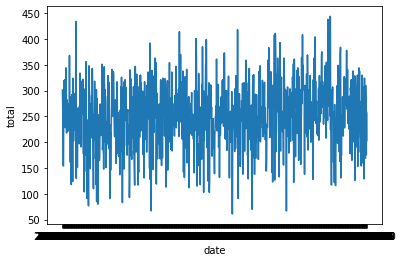

In [ ]:
sns.lineplot(x="date", y="total", data=df)

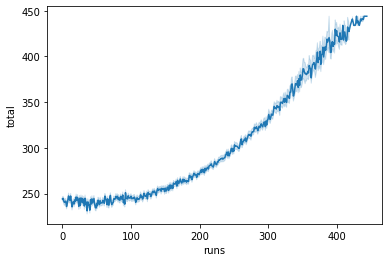

In [ ]:
sns.lineplot(x = "runs", y = "total", data=df)

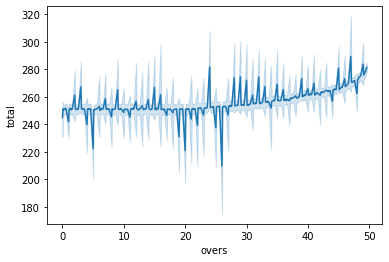

In [ ]:
sns.lineplot(x = "overs", y = "total", data = df)

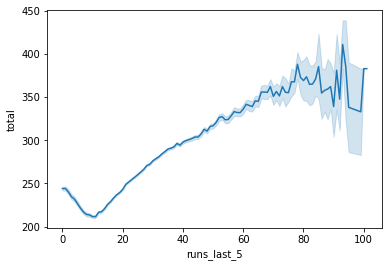

In [ ]:
sns.lineplot(x = "runs_last_5", y = "total", data = df)

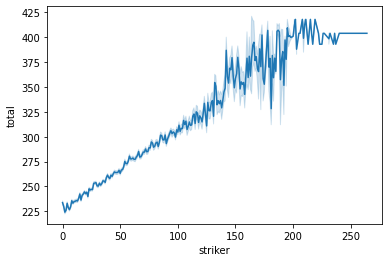

In [ ]:
sns.lineplot(x = "striker", y = "total", data = df)

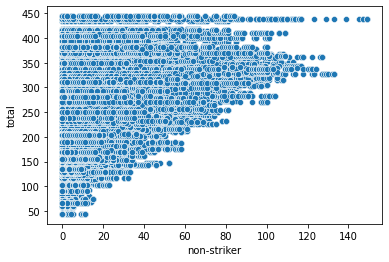

In [ ]:
sns.scatterplot(x = "non-striker", y  = "total", data = df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns = ("bat_team",	"bowl_team",	"batsman", 	"bowler", "venue", "date")
for c in columns:
  lb = LabelEncoder()
  lb.fit(list(df[c].values))
  df[c] = lb.transform(list(df[c].values))
df.head()

mid  date  venue  bat_team  ...  runs_last_5  striker  non-striker  total
0    1    50     19         6  ...            0        0            0    301
1    1    50     19         6  ...            0        0            0    301
2    1    50     19         6  ...            4        0            0    301
3    1    50     19         6  ...            6        0            0    301
4    1    50     19         6  ...            6        0            0    301

[5 rows x 13 columns]

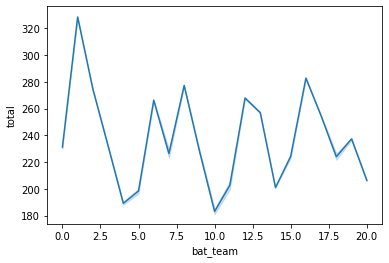

In [ ]:
sns.lineplot(x = "bat_team", y = "total", data = df)

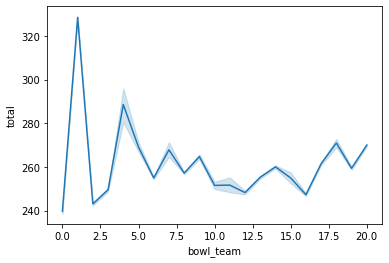

In [ ]:
sns.lineplot(x = "bowl_team", y = "total", data = df)

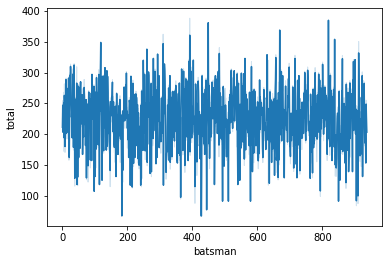

In [ ]:
sns.lineplot(x = "batsman", y = "total", data = df)

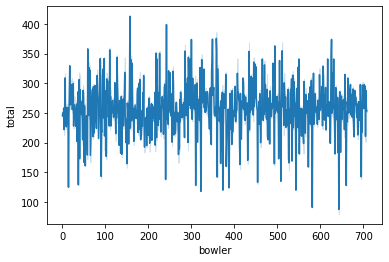

In [ ]:
sns.lineplot(x = "bowler", y = "total", data = df)

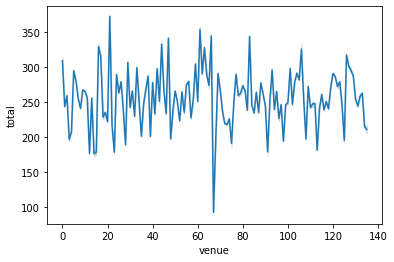

In [ ]:
sns.lineplot(x = "venue", y = "total", data = df)

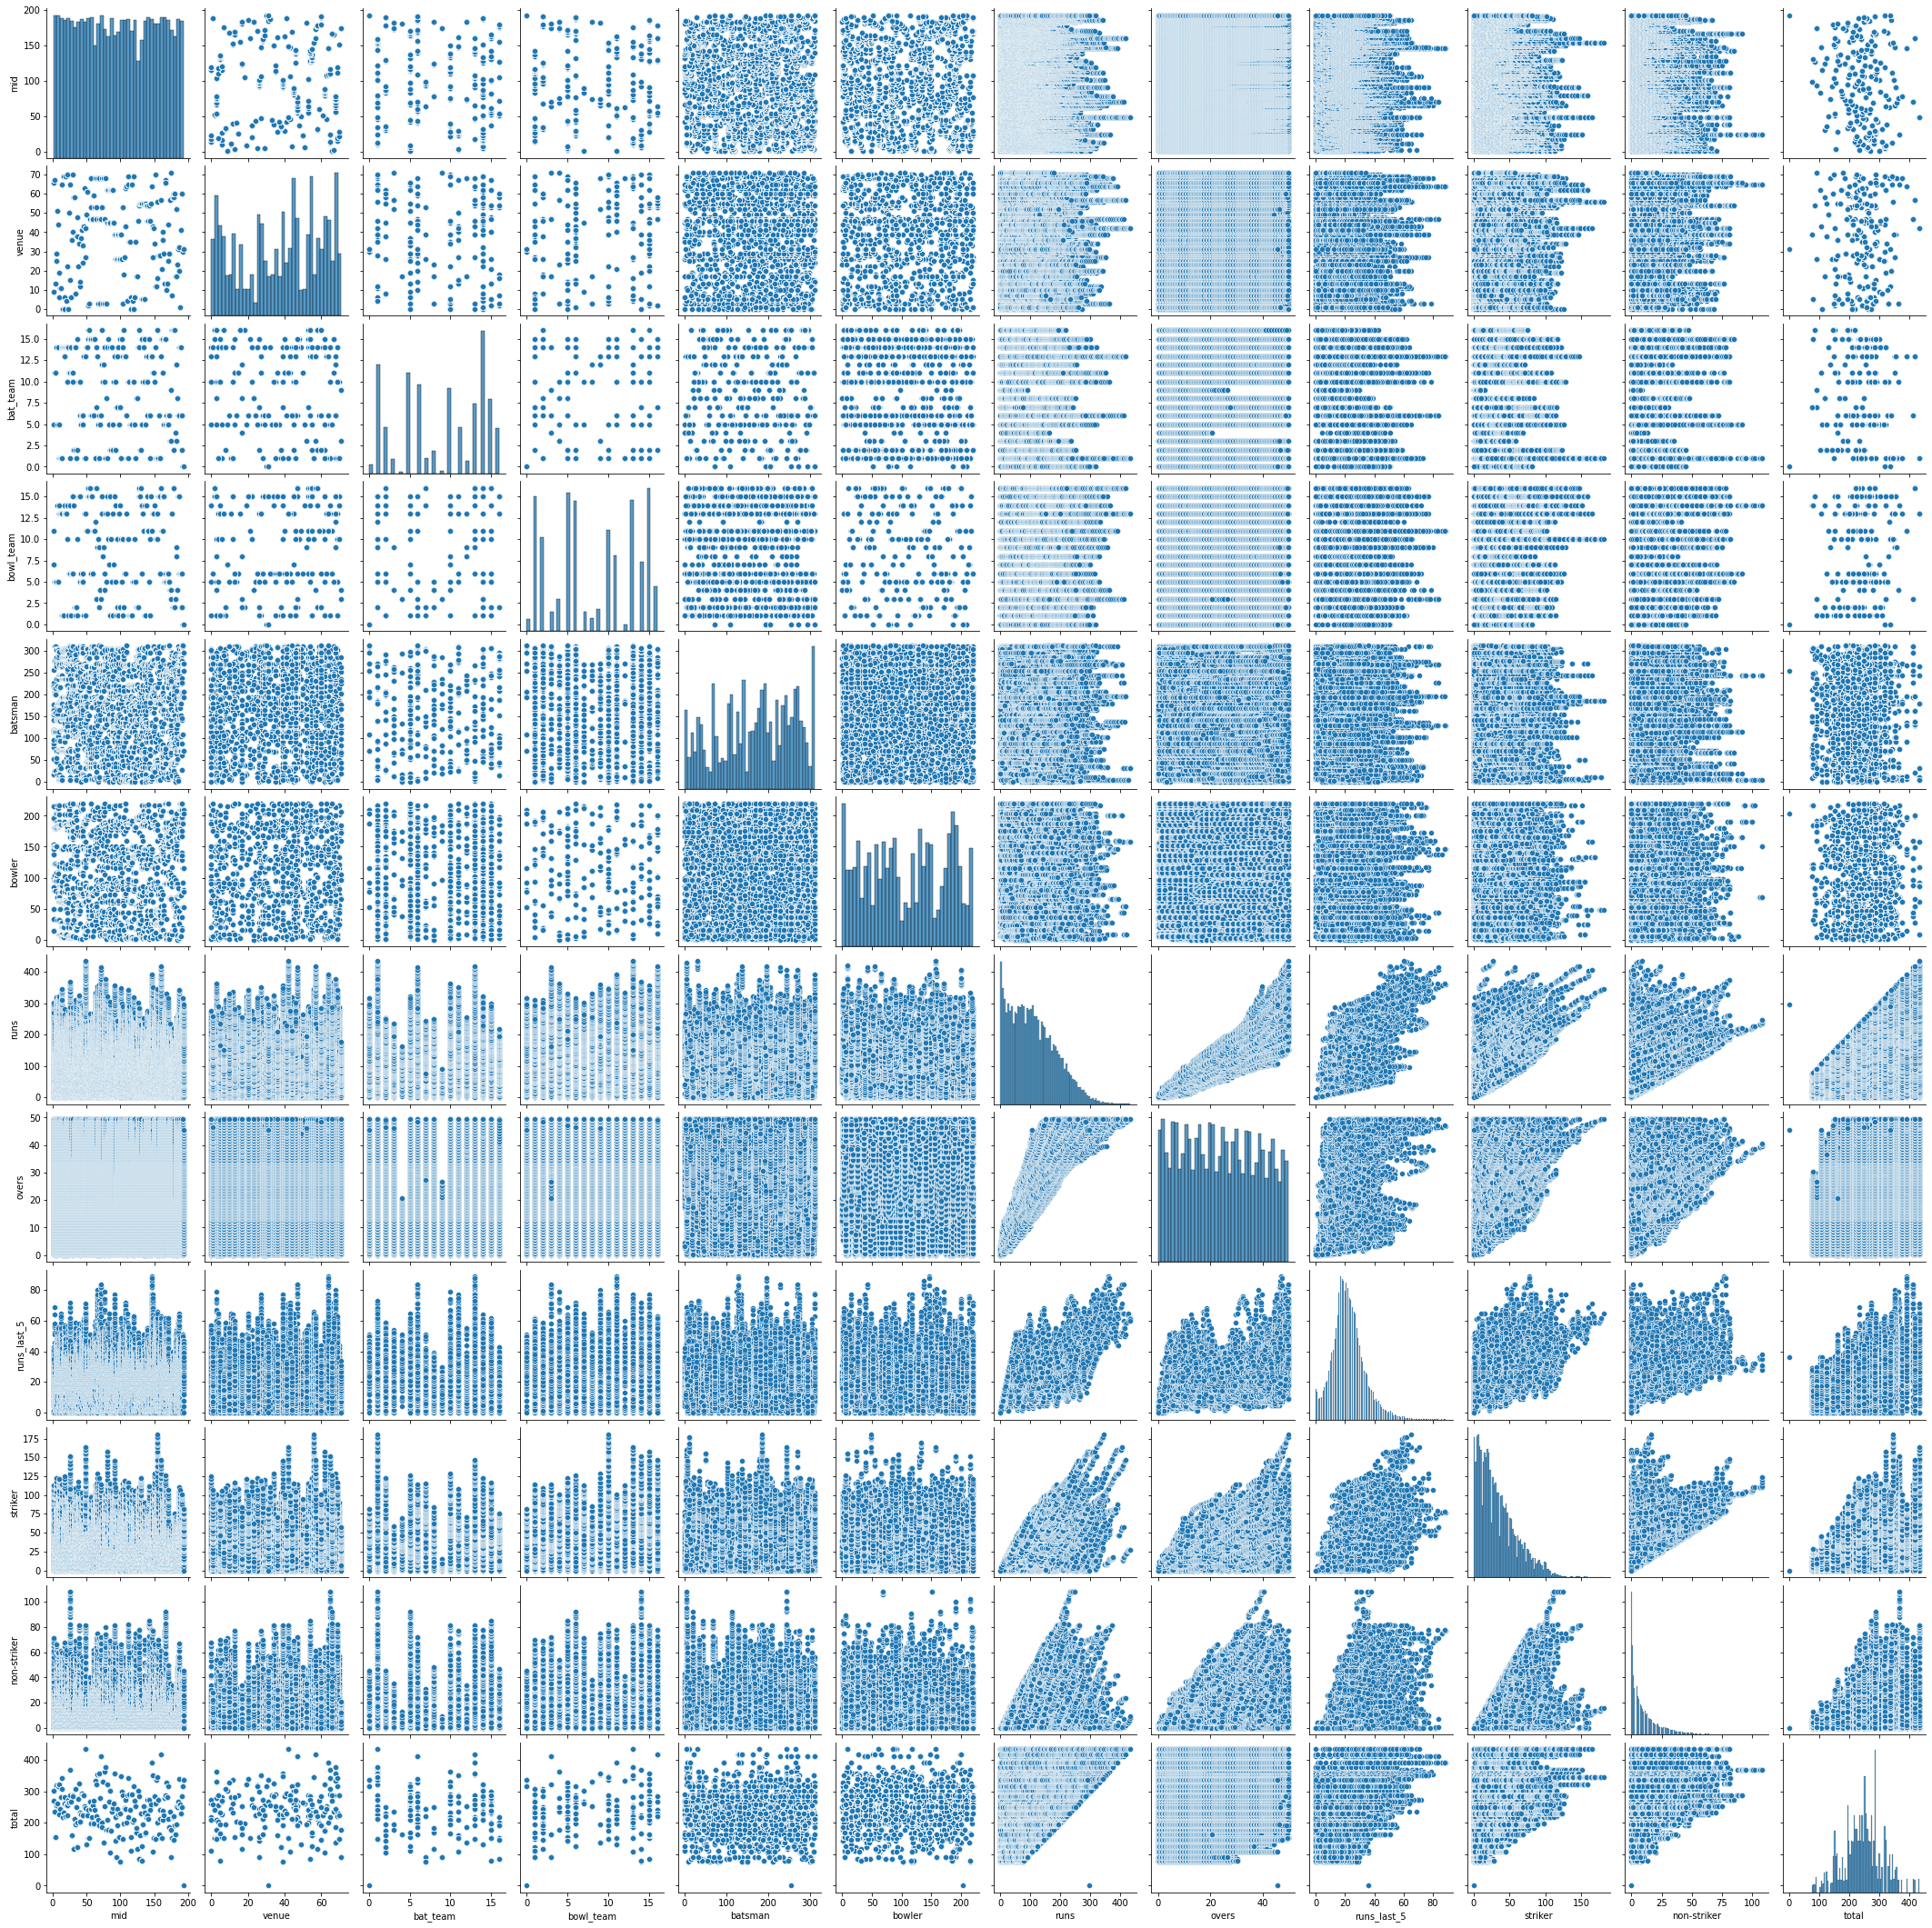

In [ ]:
sns.pairplot(df)

In [ ]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'overs', 'runs_last_5', 'striker', 'non-striker', 'total'],
      dtype='object')

In [ ]:
X = df[['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'overs', 'runs_last_5', 'striker', 'non-striker']].values
Y = df[["total"]].values
Y

array([[301],
       [301],
       [301],
       ...,
       [203],
       [203],
       [203]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape 

((263174, 12), (87725, 12), (263174, 1), (87725, 1))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.score(X_test, Y_test)

0.4733099396621348

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rfr.score(X_test, Y_test)

0.9818723591362365

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knn.score(X_test, Y_test)

0.9361644621506068